# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Входные данные**   

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

**Ход исследования**  

1. Открытие файла с данными и изучение общей информации
2. Предобработка данных
3. Расчет и добавление новых столбцов
4. Исследовательский анализ данных
5. Общий вывод

**Вопросы, интересующие заказчика:**

   - Сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой
   - Какие факторы больше всего влияют на стоимость квартиры
   - Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений
   - Какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга. Насколько они отличаются от данных в целом по городу

<a id='p1s1'></a>
## Изучение файла и получение общей информации

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# напишем функцию для отображения основной информации о датафрейме
def describe_dataframe(df):
    display(df.info())
    display(df.head())
    display(df.describe())

In [4]:
describe_dataframe(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Наблюдения по общей информации о датасете:**

- first_day_exposition - object - должен быть тип datetime
- ceiling_height - нулевые значения
- floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
- is_apartment - должен быть тип bool + нулевые значения
- living_area - нулевые значения
- kitchen_area - нулевые значения
- balcony - нулевые значения
- locality_name - нулевые значения
- airports_nearest - нулевые значения
- cityCenters_nearest - нулевые значения
- parks_around3000 - тип должен быть int + нулевые значения
- parks_nearest - нулевые значения
- ponds_around3000 - тип должен быть int + нулевые значения
- ponds_nearest - нулевые значения
- days_exposition - тип должен быть int + нулевые значения

Для выявления и обработки неправдоподобных значений смотрим на значения в min(минимальные) и max (максимальные).

-total_area - общая площадь квартиры. Максимальное значение 900 кв.м. 

-ceiling_height - высота потолков . С такими данными уже все сложнее. Все строки, где потолки выше 15 метров, удалим из датасета.

-floors_total - общая этажность дома и floor - этаж, на котором расположена продаваемая квартира (столбец , в котором максимальное значение - 33 этажа). Самое высокое здание из достроенных - 42 этажа. Поэтому все дома выше 42 этажей удалим.

-living_area - жилая площадь - величиной в 409 кв.м. - вполне реальная, учитывая вышеупомянутые общие площади квартир и в 900 кв.м, и в 2180 кв.м.

-balcony - число балконов - максимальное количество 5. 

-kitchen_area - площадь кухни , максимальное значение - 112 кв.м. В квартире площадью 900 кв.м. это не удивительно.

-airports_nearest - расстояние до ближайшего аэропорта , максимальное значение 84869 метров, или 84 километра. Вот это уже неправдоподобное значение.

-city_centers_nearest -расстояние до центра - 65968 метров, или 65 км (можно округлить до 66) - тоже неправдоподобное значение. 

-parks_around_3km — число парков в радиусе 3 км . Минимальное значение - 1, максимальное - 3. Правдоподобно.

-parks_nearest — расстояние до ближайшего парка (м) . Минимум - 1 метр, максимум - 3190 метров, или 3,2 км. Правдоподобно.

-ponds_around3000 — число водоёмов в радиусе 3 км . Минимум - 0, максимум - 3. Правдоподобно.

-ponds_nearest — расстояние до ближайшего водоёма (м) . Минимум - 13 метров, максимум - 1344 метра, или 1,3 км. Правдоподобно.

-days_exposition — сколько дней было размещено объявление (от публикации до снятия). Минимум - 1 день, максимум - 1580 дней, или 4 года и 4 месяца. Правдоподобно

В целом, данные выглядят нормально. Правда, есть аномальные значения в данных, необходимо их проверить

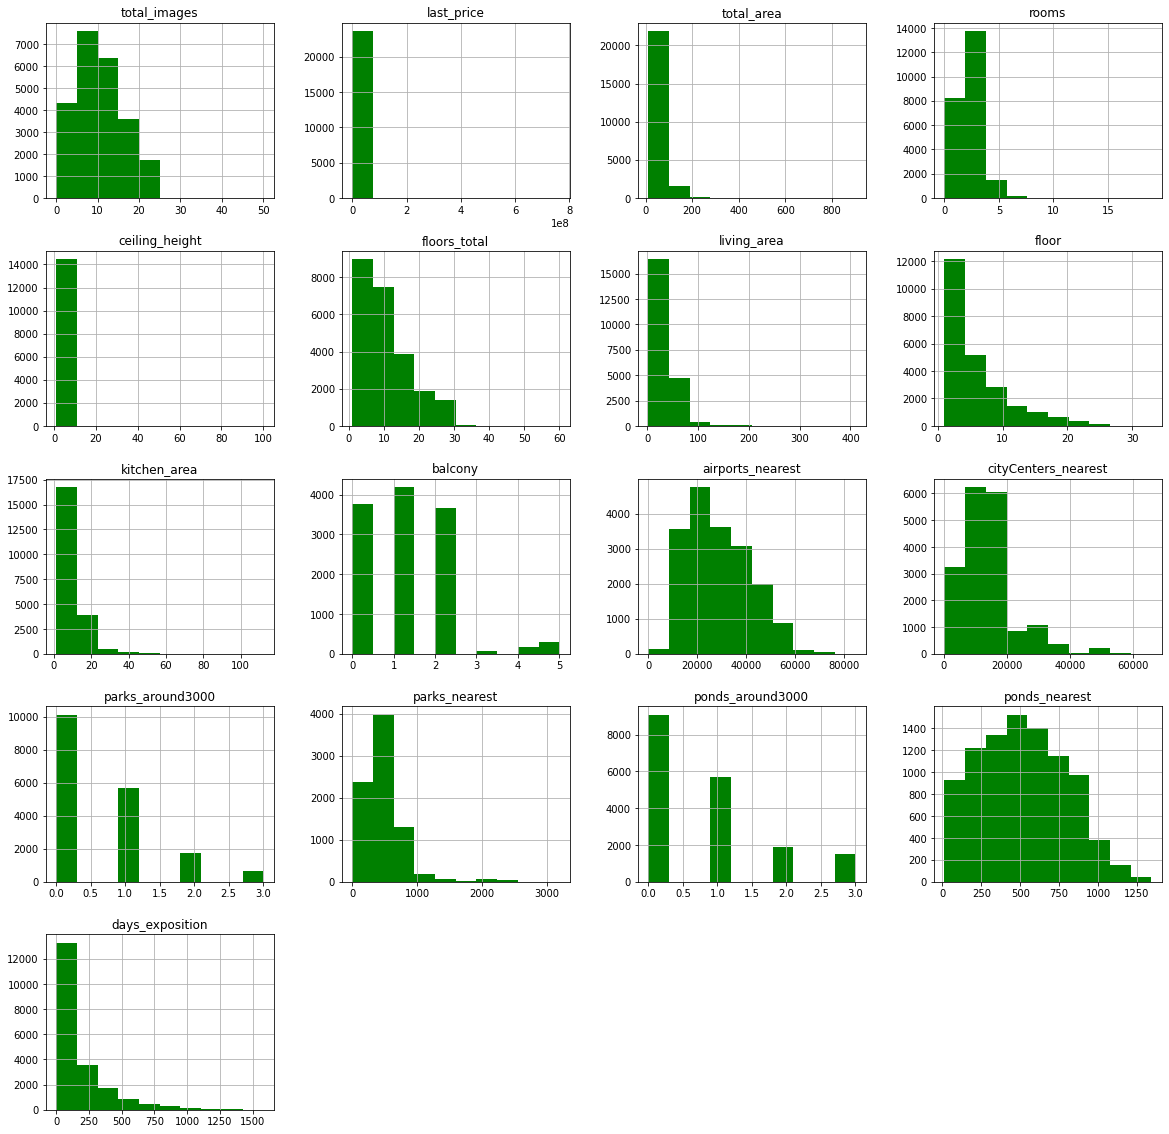

In [5]:
# Постром гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(20, 20), color='green', grid=True);

Сразу переименуем некорректные названия столбцов для последующей работы.

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                        'parks_around3000': 'parks_around_3km',
                        'ponds_around3000': 'ponds_around_3km',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<a id='p1s2'></a>
### Вывод по общей информации

Присутствуют столбцы с некорректными типами данных: 
- is_apartment заявлен как булевый тип
- в датасете 'object', first_day_exposition - 'object' вместо 'datetime', и т.д.
- В данных множество пропусков
- Очевидно присутствуют вылеты в данных и аномальные значения: 

    1. высота потолков (ceiling_height) = 100м.; 
    2. расстояние до ближайшего аэропорта (airports_nearest) = 0м. и т.д.
    
В целом данные читаются и готовы для предобработки

## Предобработка данных

<a id='p2s1'></a>
### Проверка на пропуски и заполнение пропусков
Посмотрим на количество пропущенных данных в столбцах по убыванию

In [7]:
def percent_of_nan(df):
    nan_sum = df.isnull().sum(axis = 0).sort_values(ascending = False)
    nan_percent = (nan_sum / len(df))*100
    new_frame = {'Число пропусков': nan_sum, 'Процент пропусков': nan_percent}
    dataframe = pd.DataFrame(new_frame).sort_values(by = 'Процент пропусков', ascending = False).round(2)
    return dataframe

percent_of_nan(data)

,Число пропусков,Процент пропусков
is_apartment,20924,88.29
parks_nearest,15620,65.91
ponds_nearest,14589,61.56
balcony,11519,48.61
ceiling_height,9195,38.80
airports_nearest,5542,23.38
city_centers_nearest,5519,23.29
ponds_around_3km,5518,23.28
parks_around_3km,5518,23.28
days_exposition,3181,13.42


**Вывод**

Чтобы понять можем ли мы заменить Nan на нули, посмотрим откуда могут идти данные по данным признакам:

1. Если в стоблце **balcony** пропущено значение, значит балкон в квартире отсутствует и при заполнении его просто пропускали, поэтому можно заполнить эти данные нулем.

In [8]:
# заполнение пропущенных значений
data['balcony'] = data['balcony'].fillna(0)
print('Количество пропусков в столбце balcony:', data['balcony'].isnull().sum())

Количество пропусков в столбце balcony: 0


2. Наибольшее количество пропусков в столбце **is_apartment** - 20924 значений пропущено, возможно значение апартаментов не предполагалось ранее.

In [9]:
#столбец возможно появился не вместе с началом ведения записей, все пропущенные значения заменим на False,
data['is_apartment'] = data['is_apartment'].fillna(False)

3. **ceiling_height** - высота потолков. 
Если значение пропущено, то вероятнее всего клиент не имел на момент ввода данных данного параметра. Поэтому правильнее вначале заменить на ноль, а затем провести проверку и выбрать замену по медиане или среднему

In [10]:
print("Количество квартир с потолками выше 4 метров:", data[data['ceiling_height'] >= 4].count()[0])

Количество квартир с потолками выше 4 метров: 114


Сталинки и элитное жилье имеют высоту потолков до 4 метров. Все, что выше 4 метров - это пентхаусы.

114 пентхаусов из 23699 квартир - это вполне правдоподобная цифра. Их действительно очень мало от общего числа, поэтому оставим, как есть.

In [11]:
print("Количество квартир с потолками выше 15 метров:", data[data['ceiling_height'] > 15].count()[0])

Количество квартир с потолками выше 15 метров: 23


In [12]:
# удалить квартиры с потолками выше 15 метров
data.drop(data.loc[data['ceiling_height'] > 15].index, inplace=True)

Определим медианное значение для высоты потолков

In [13]:
data['ceiling_height'].value_counts()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
3.59       1
3.76       1
5.20       1
2.89       1
4.65       1
Name: ceiling_height, Length: 174, dtype: int64

In [14]:
data['ceiling_height'].median()

2.65

In [15]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

4. **parks_around_3km** и **ponds_around_3km**

['parks_around3000'] и ['ponds_around3000'] хранят в себе информацию о количестве парков и прудов (водоемов) в радиусе 3 тыс. метров. Вполне возможно NaN означает, что в этом радиусе нет прудов и парков в соответствующих столбцах и по этой причине эти ячейки не заполнялись. Также можно заметить, что в этих столбцах одинаковое количество пропусков. Заменим Nan в этих столбцах на 0 и преобразуем в тип данных int

In [16]:
data.parks_around_3km = data.parks_around_3km.replace(np.nan, 0).astype(int)
data.ponds_around_3km = data.ponds_around_3km.replace(np.nan, 0).astype(int)

print('Количество пропусков в parks_around3000:', data.parks_around_3km.isnull().sum(), 'Тип данных', data.parks_around_3km.dtypes)
print('Количество пропусков в ponds_around3000:', data.ponds_around_3km.isnull().sum(), 'Тип данных', data.ponds_around_3km.dtypes)

Количество пропусков в parks_around3000: 0 Тип данных int64
Количество пропусков в ponds_around3000: 0 Тип данных int64


5. **parks_nearest** и **ponds_nearest**

Не будем заполнять пропуски, т.к. расстояние до парков и прудов трудно предсказать на основе имеющихся даных

6. **airports_nearest**, **city_centers_nearest**

Т.к. мы ничего не знаем о расположении объектов (нет геометок) пропуски в этих столбцах мы заполнить не сможем.


In [17]:
percent_of_nan(data)

,Число пропусков,Процент пропусков
parks_nearest,15604,65.91
ponds_nearest,14573,61.55
airports_nearest,5533,23.37
city_centers_nearest,5510,23.27
days_exposition,3175,13.41
kitchen_area,2274,9.60
living_area,1903,8.04
floors_total,86,0.36
locality_name,49,0.21
is_apartment,0,0.00


<a id='p2s2'></a>
### Вывод по пропускам

Данные по удаленности объекта от парков, прудов и центра были предоставлены автоматически, в случае их пропусков, произошел технический сбой и такие данные не могут быть заполнены вручную либо средними значениями. Поэтому пропуски в этих данных будут оставлены в таблице.
Пропуски в количестве этажей и наименовании местности будут удалены в следующем шаге.

Остальные пропуски были заполнены.

<a id='p2s3'></a>
### Изменение типов данных в столбцах

In [18]:
# еще раз посмотрим на типы данных столбцов
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
is_studio                  bool
is_open_plan               bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3km          int64
parks_nearest           float64
ponds_around_3km          int64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [19]:
# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

In [20]:
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [21]:
# приводим тип данных is_apartк булеву значению как сказано в описании
data['is_apartment'] = data['is_apartment'].astype('bool')

In [22]:
# Приводим столбцы к целочисленному типу
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around_3km',
               'parks_nearest', 'ponds_around_3km', 'ponds_nearest', 'days_exposition']
for column in list_to_int:
    data[column] = data[data[column].notnull()][column].astype('int')

In [23]:
# Округляем до 1 знака после запятой
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for column in list_to_float_1:
    data[column] = data[data[column].notnull()][column].round(1)

In [24]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
is_studio                         bool
is_open_plan                      bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3km                 int64
parks_nearest                  float64
ponds_around_3km                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

<a id='p2s4'></a>
### Поиск дубликатов

In [25]:
data.duplicated().sum()

0

Явных дубликатов нет, но стоит проверить данные на неявные дубликаты в названиях локаций, указанных квартир

In [26]:
# оценим записи в locality_name
print('Список уникальных наименований населенных пунктов:', len(data['locality_name'].unique()))
print(data['locality_name'].value_counts())

Список уникальных наименований населенных пунктов: 363
Санкт-Петербург      15638
посёлок Мурино         518
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
                     ...  
деревня Каськово         1
деревня Тихковицы        1
деревня Лупполово        1
деревня Курковицы        1
деревня Ялгино           1
Name: locality_name, Length: 363, dtype: int64


На всякий случай сохраним оригинальные данные и для поиска неявных дубликатов создадим новую ячейку 'locality_name_modify'

In [27]:
# переведем названия в нижний регистр
data['locality_name_modify'] = data['locality_name'].str.lower()
# заменим все 'ё' на 'е'
data['locality_name_modify'] = data['locality_name_modify'].str.replace('ё', 'е')
data['locality_name_modify'] = data['locality_name_modify'].str.replace('поселок городского типа', 'поселок')
data['locality_name_modify'] = data['locality_name_modify'].str.replace('коттеджный поселок', 'поселок')
data['locality_name_modify'] = data['locality_name_modify'].str.replace('городской поселок', 'поселок')

# проверка
print('Список уникальных наименований населенных пунктов после поиска дубликатов:', \
      len(data['locality_name_modify'].unique()))

Список уникальных наименований населенных пунктов после поиска дубликатов: 320


<a id='p2s5'></a>
### Вывод по дубликатам

Явные дубликаты в таблице отсутствовали, тем не менее было много данных о местоположении квартиры, в частности поселки и поселки городского типа. Все различные типы поселков были приведены к единому названию "Поселок"

## Посчитайте и добавьте в таблицу новые столбцы

### Добавление новых столбцов в таблицу

- Посчитаем и добавим цену квадратного метра:

In [28]:
data['price_of_m2'] = data['last_price']/data['total_area']
data['price_of_m2'] = data['price_of_m2'].astype(int) #округлим до целых, тк это цена за кв.метр.

- Добавим год, месяц и день публикации объявления:

In [29]:
data['first_day_exposition'].dt.date # конвертация в формат даты
data['first_day_exposition'].astype('datetime64[M]')

0       2019-03-01
1       2018-12-01
2       2015-08-01
3       2015-07-01
4       2018-06-01
           ...    
23694   2017-03-01
23695   2018-01-01
23696   2018-02-01
23697   2017-03-01
23698   2017-07-01
Name: first_day_exposition, Length: 23542, dtype: datetime64[ns]

In [30]:
data['weekday_exposition'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())
data['month_exposition'] = data['first_day_exposition'].apply(lambda x: x.month)
data['year_exposition'] = data['first_day_exposition'].apply(lambda x: x.year)

In [31]:
weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг',
                    5: 'пятница', 6: 'суббота', 7: 'воскресенье'}
data['weekday_exposition'] = data['weekday_exposition'].map(weekdays)
data['weekday_exposition']

0            четверг
1            вторник
2            четверг
3            пятница
4            вторник
            ...     
23694        вторник
23695    понедельник
23696    воскресенье
23697        вторник
23698        пятница
Name: weekday_exposition, Length: 23542, dtype: object

In [32]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

#категоризуем этажи с помощью функции
data['floor_category'] = data.apply(floor_category, axis = 1)

#добавим столбец соотношения жилой площади к общей
data['useful_area_ratio'] = data['living_area'] / data['total_area']
data['useful_area_ratio'] = data['useful_area_ratio'].round(2) #округлим до двух цифр после запятой

#добавим столбец отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area_ratio'].round(2) #округлим до двух цифр после запятой

In [33]:
# добавим столбец расстояние от центра в км
data['to_center_km'] = data.city_centers_nearest // 1000
data['to_center_km'].head()

0    16.0
1    18.0
2    13.0
3     6.0
4     8.0
Name: to_center_km, dtype: float64

Добавим категории следующим образом:
- центр: 0 - 2км
- центральная часть (напримем, Петроградский район): 2 - 5км
- до КАД: 5-20км
- после КАД: 20 и болле км (область)

In [34]:
def fill_ceiling_height(row):
    if row['city_centers_nearest'] <= 2000:
        return 'центр'
    elif row['city_centers_nearest'] > 2000 and row['city_centers_nearest'] <= 5000:
        return 'центральная часть'
    elif row['city_centers_nearest'] > 5000 and row['city_centers_nearest'] <= 20000:
        return 'до КАД'

    return 'область'

data['fromcenter_cat'] = data.apply(fill_ceiling_height, axis=1) #добавим столбец с категорией в таблицу
#estate['fromcenter_cat'].value_counts()
#estate.head(10) #посмотрим
data['fromcenter_cat'].value_counts()

до КАД               13382
область               8102
центральная часть     1732
центр                  326
Name: fromcenter_cat, dtype: int64

### Вывод

После предобработки данных в таблицу были добавлены новые столбцы:

1. цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «первый», «последний», «другой»);
6. расстояние от центрв в км;


## Исследовательский анализ данных

### Изучение и описание параметров

In [35]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23542.000000,2.354200e+04,23542.000000,23542.000000
mean,60.329526,6.541688e+06,2.070810,2.681815
std,35.668031,1.091575e+07,1.078755,0.254638
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.600000
75%,69.700000,6.790000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,14.000000


**Наблюдения:**

1. total_area - среднее значение площади квартир адекватно, но есть и 900 квардратов, похоже на выброс

2. last_price - цены на любой кошелек

3. rooms - от 0 до 19!


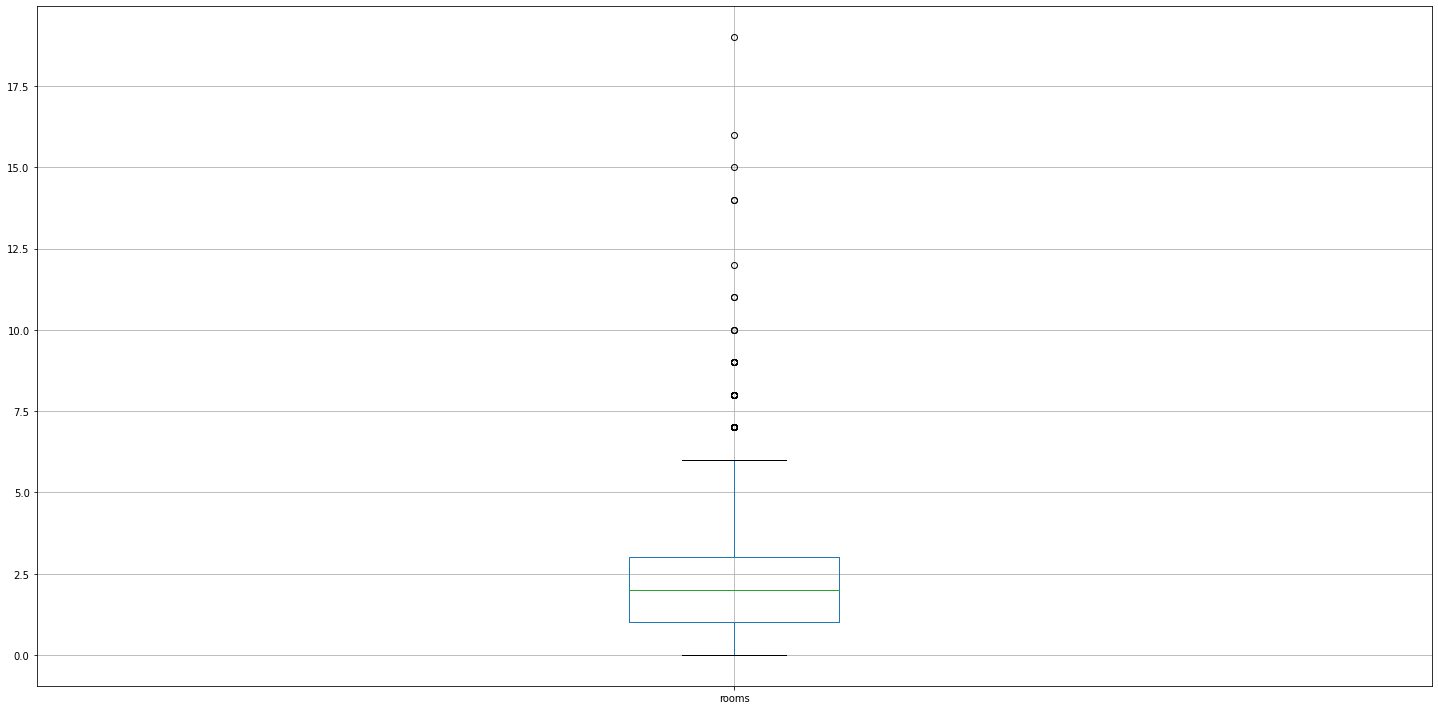

In [36]:
data.boxplot('rooms', figsize = (25,12.5));

Определим границы по усам boxplot:

rooms - от 0 до 6 комнат

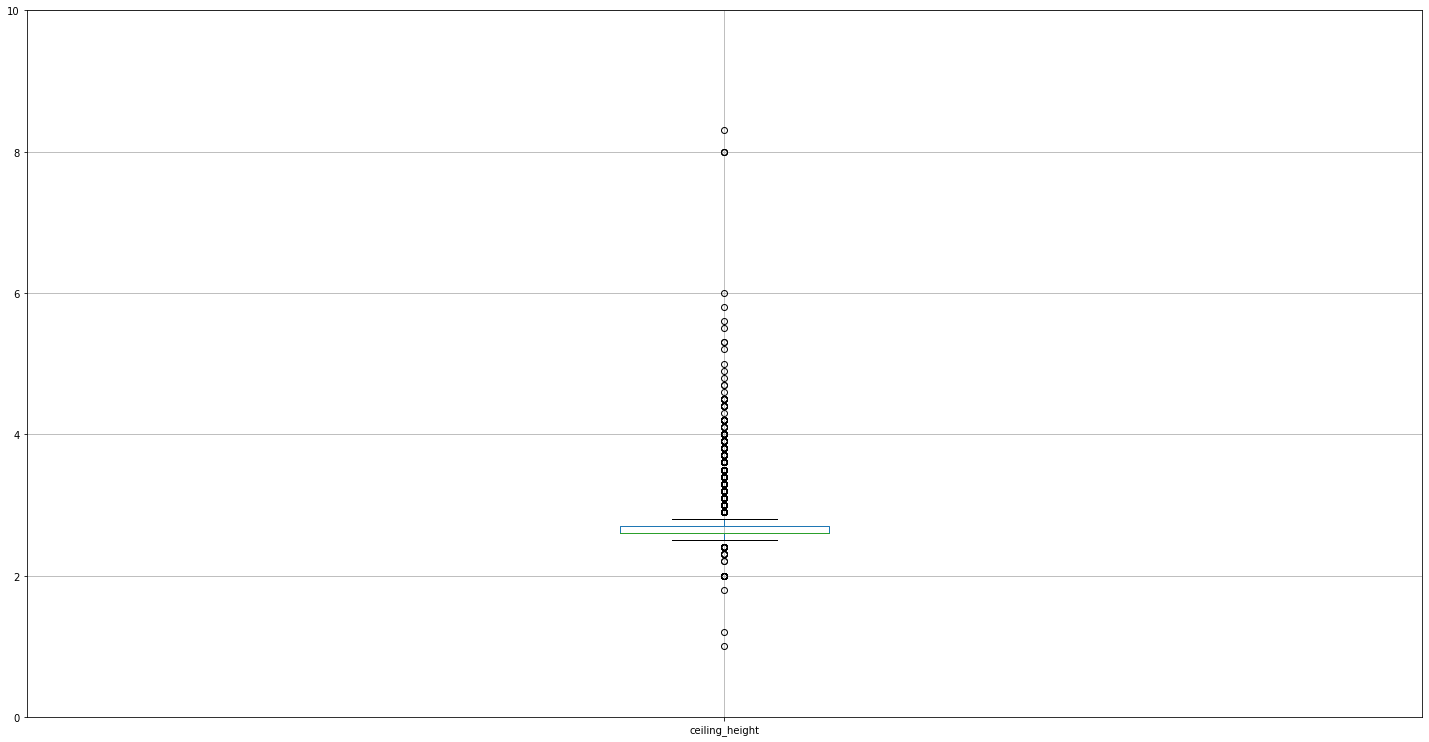

In [37]:
data.boxplot('ceiling_height', figsize = (25,13))
plt.ylim(0, 10);

ceiling_heght - от 2,4 до 3,3 м

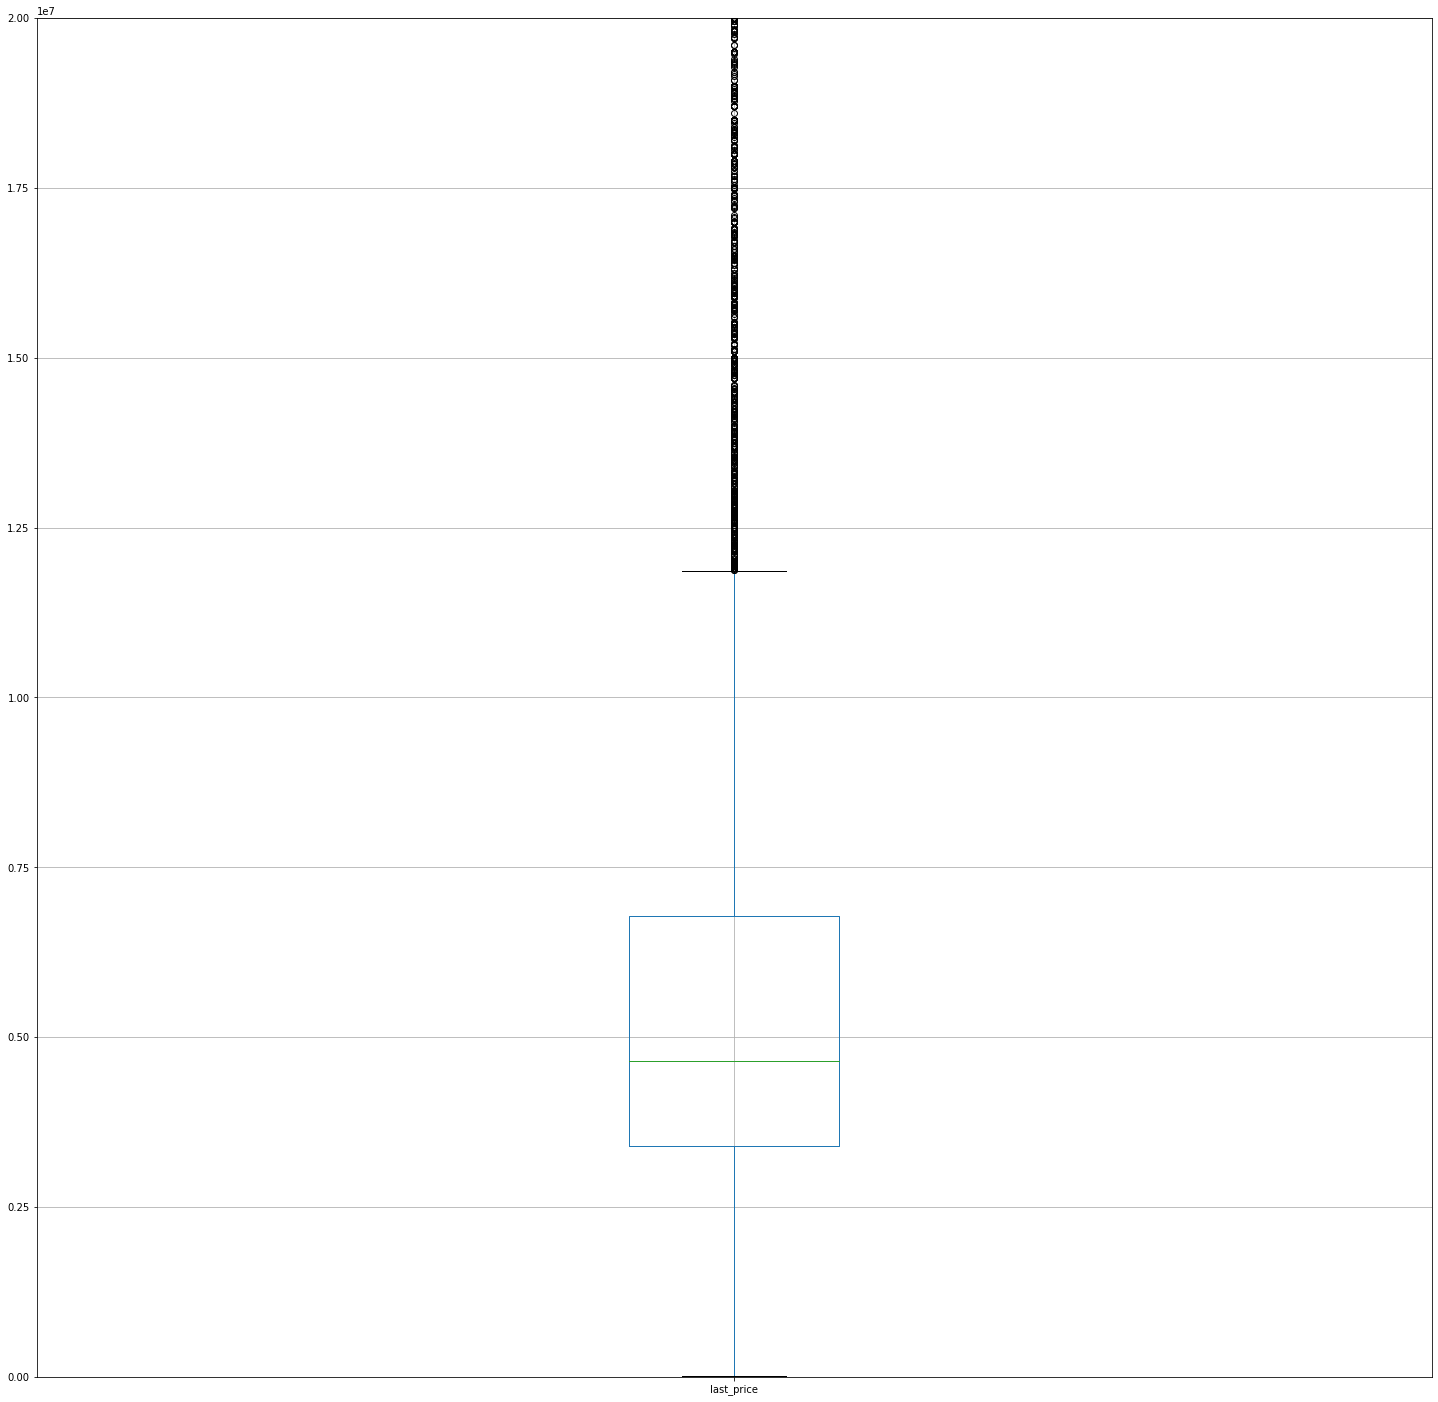

In [38]:
data.boxplot('last_price', figsize = (25, 25))
plt.ylim(0,20000000); #уменьшим масштаб

last_price - 0 - 12 млн руб.

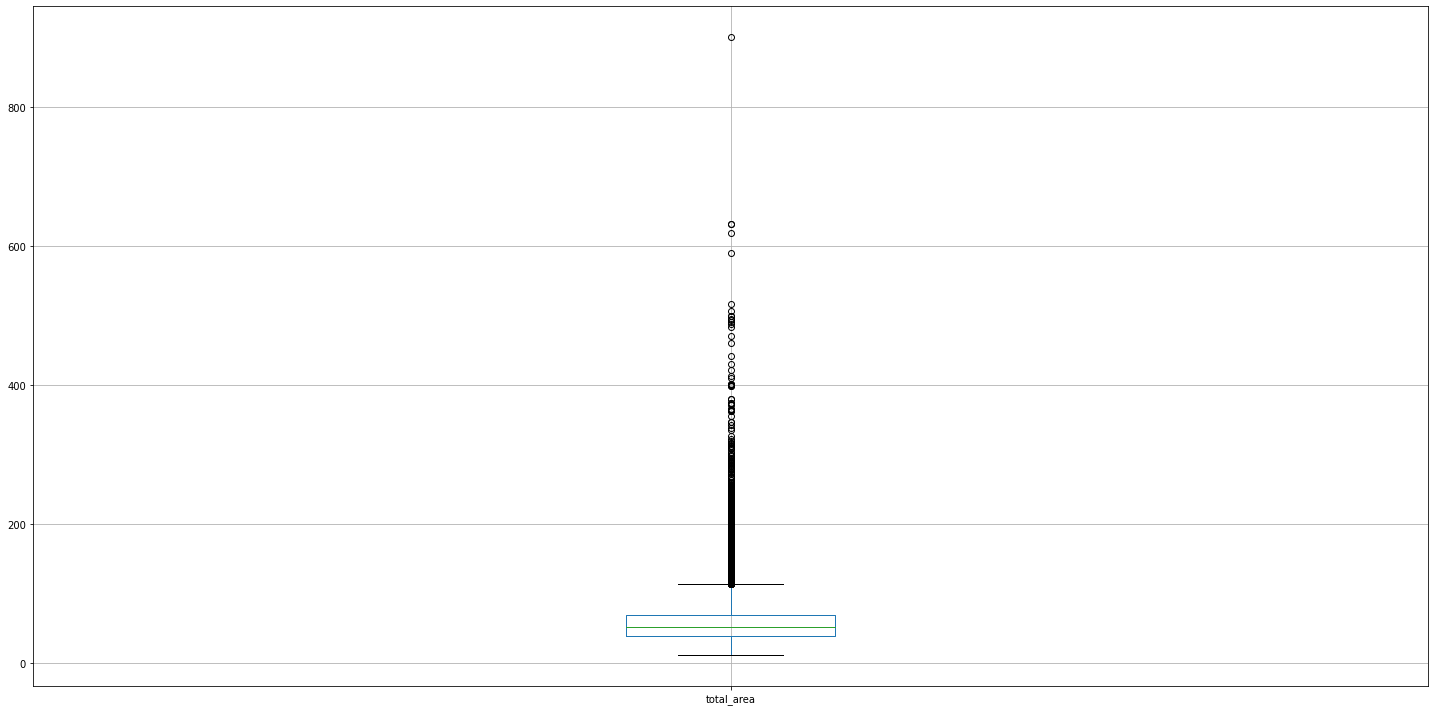

In [39]:
data.boxplot('total_area', figsize = (25,12.5));

total_area - 20 - 120- кв.м.

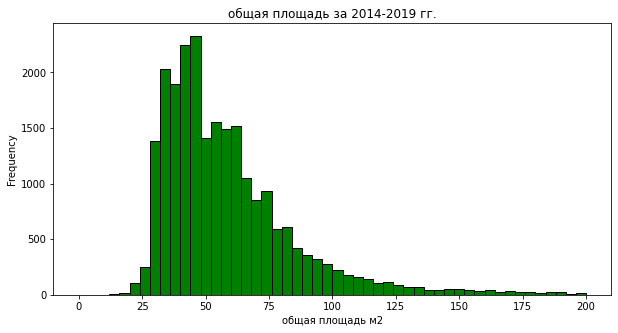

In [40]:
fig, ax = plt.subplots()
data['total_area'].plot(kind='hist', ec = 'black', bins = 50, range =(0,200), grid = False, figsize = (10,5), color='green')
ax.set_title('общая площадь за 2014-2019 гг.')
ax.set_xlabel('общая площадь м2');

**Распределение по площади** - наибольшее число квартир от 30 до 75 метров

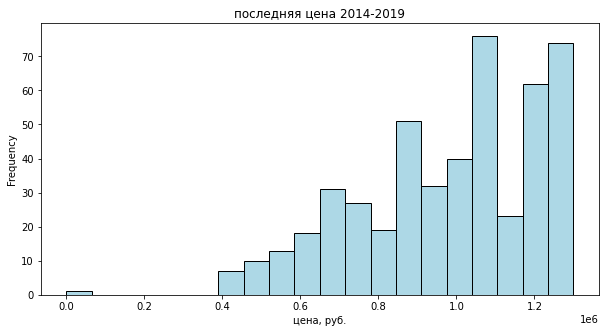

In [41]:
fig, ax = plt.subplots()
ax.set_title('последняя цена 2014-2019')
data['last_price'].plot(kind = 'hist', ec = 'black', bins = 20, range =(0,1300000),
                          color = 'lightblue', grid = False, figsize = (10,5))
ax.set_xlabel('цена, руб.');

**цена квартиры** - от 6 до 12 млн.руб

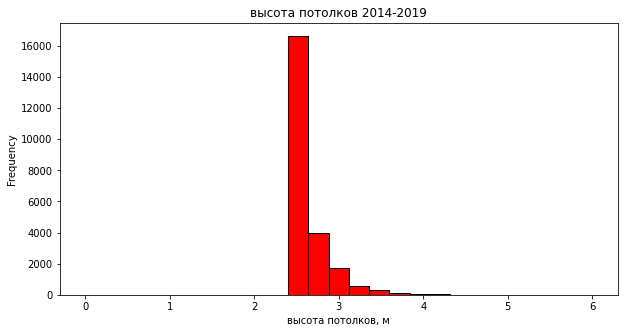

In [42]:
fig, ax = plt.subplots()
ax.set_title('высота потолков 2014-2019')
data['ceiling_height'].plot(kind='hist', ec = 'black', bins = 25, range =(0,6), color = 'red', grid = False, figsize = (10,5))
ax.set_xlabel('высота потолков, м');

**Высота потолков** - высота потолков в большинстве квартиа от 2,4 до 2,8 м, остальное - редкость

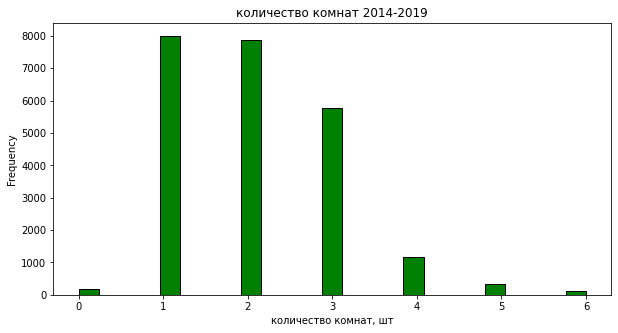

In [43]:
fig, ax = plt.subplots()
data['rooms'].plot(kind='hist', ec = 'black', bins = 25, range =(0,6), color = 'green', grid = False, figsize = (10,5))
ax.set_title('количество комнат 2014-2019')
ax.set_xlabel('количество комнат, шт');

**Количество комнат** от 1 до 3, остальное - редкость

**Изучим время продажи квартир**

In [44]:
print('Медиана по длительности продажи квартир', data['days_exposition'].median()) #найдем медиану

Медиана по длительности продажи квартир 95.0


In [45]:
data['days_exposition'].describe().to_frame() #посмотрим остальные данные

,days_exposition
count,20377.000000
mean,180.780488
std,219.775150
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


Среднее время продажи квартиры - 180 дней, медиана 95. 1580 дней - вероятно не закрытые объявления. Среднее и медиана - вполне реальные значения

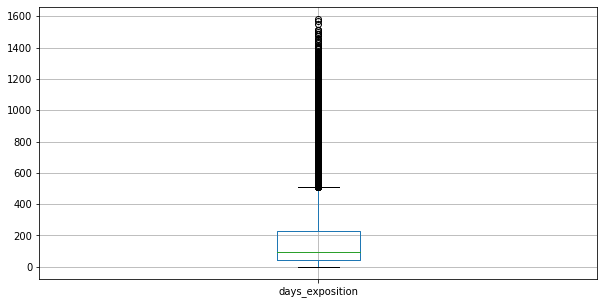

In [46]:
data.boxplot('days_exposition', figsize=(10,5));

Разумные границы продажи - 500 дней

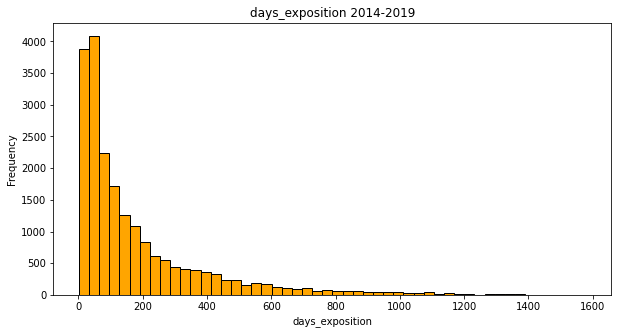

In [47]:
fig, ax = plt.subplots()
data['days_exposition'].plot(kind='hist', bins=50, figsize=(10,5), ec='black',grid = False, color = 'orange');
ax.set_title('days_exposition 2014-2019')
ax.set_xlabel('days_exposition');

Большинство квартир продается за 50 дней. Чем выше срок продажи, тем реже случаются сделки. Разумно будет сделать срез до 500 дней

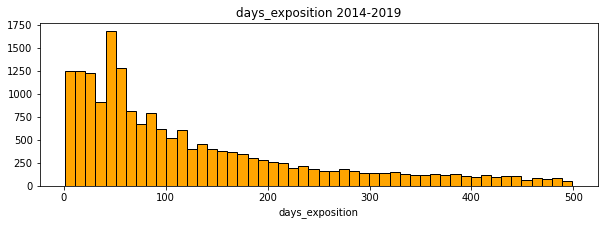

In [48]:
fig, ax = plt.subplots()
ax.set_xlabel('days_exposition')
ax.set_title('days_exposition 2014-2019')
data.query('days_exposition<500')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black',grid = False, color = 'orange');

Есть пик продаж в районе 40-60 дней. Выглядит необычно. Рассмотри этот интервал.

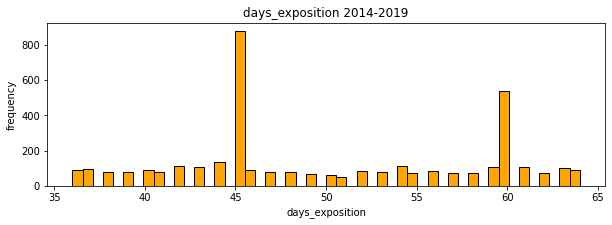

In [49]:
fig, ax = plt.subplots()
ax.set_xlabel('days_exposition')
ax.set_ylabel('frequency')
ax.set_title('days_exposition 2014-2019')
data.query('35<days_exposition<65')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black',grid = False, color = 'orange');

Видные четкие всплески продаж квартир на 45 и 60 день, возможно связано с автоматическим закрытием объявлений на 45 и 60 день и не продлении периода размещения. Посмотрим промежуток 75 и 90 дней.

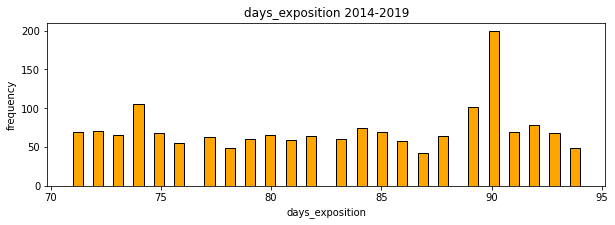

In [50]:
fig, ax = plt.subplots()
ax.set_xlabel('days_exposition')
ax.set_ylabel('frequency')
ax.set_title('days_exposition 2014-2019')
data.query('70<days_exposition<95')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black',grid = False, color = 'orange');

На 90 дней тоже всплеск, 75 дней эту теорию опровергают. Тогда добавим 15 и 30

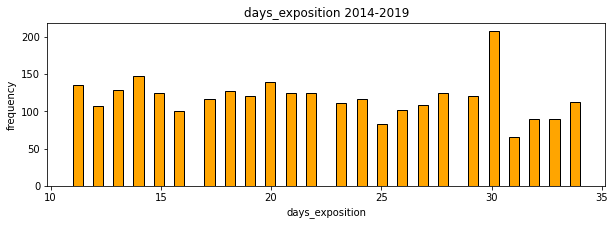

In [51]:
fig, ax = plt.subplots()
ax.set_xlabel('days_exposition')
ax.set_ylabel('frequency')
ax.set_title('days_exposition 2014-2019')
data.query('10<days_exposition<35')['days_exposition'].hist(bins=50, figsize=(10,3), ec='black',grid = False, color = 'orange');

Похоже автоматическое закрытие происходит раз в месяц + на 45 день (возможно бесплатный пробный период 2 недели + месяц сверху ) Идём дальше.

In [52]:
print("Количество квартир, которые продавались больше года:", data[data['days_exposition'] >= 365].count()[0])
print("Количество квартир, которые продавались больше 2 лет:", data[data['days_exposition'] >= 730].count()[0])
print("Количество квартир, которые продавались больше 3 лет:", data[data['days_exposition'] >= 1095].count()[0])
print("Количество квартир, которые продавались больше 4 лет:", data[data['days_exposition'] >= 1460].count()[0])

Количество квартир, которые продавались больше года: 3040
Количество квартир, которые продавались больше 2 лет: 747
Количество квартир, которые продавались больше 3 лет: 168
Количество квартир, которые продавались больше 4 лет: 11


In [53]:
data[['days_exposition']].describe()

,days_exposition
count,20377.000000
mean,180.780488
std,219.775150
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


Медианное время продажи квартиры - 124 дня (4 месяца). Среднее - 180 дней (полгода).

Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

**Зависимость цены от числа комнат, этажа и удалённости от центра**

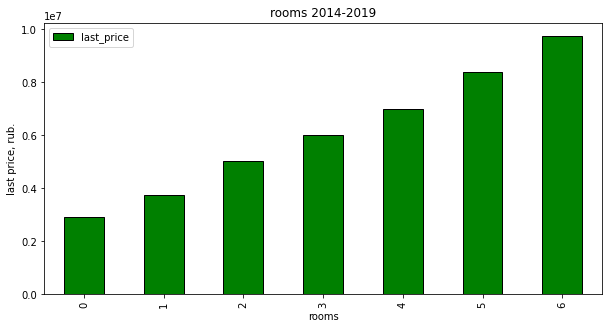

In [54]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('rooms 2014-2019')
data.query('last_price<12000000 and rooms<=6').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'green', ec = 'black', ax=ax); #сразу возьмем без выбросов

логичный вывод - **Чем больше комнат, тем выше цена**

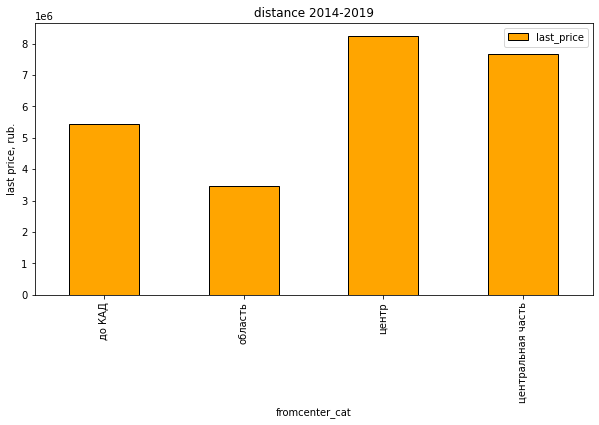

In [55]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('distance 2014-2019')
data.query('last_price<12000000').pivot_table(index ='fromcenter_cat', values='last_price').plot(kind ='bar',figsize = (10,5)
                                                                          , color = 'orange', ec = 'black', ax=ax);
#сразу возьмем срез по нашему диапазону до 12 млн руб (без выбросов)

Чем ближе к центру, тем выше стоимость

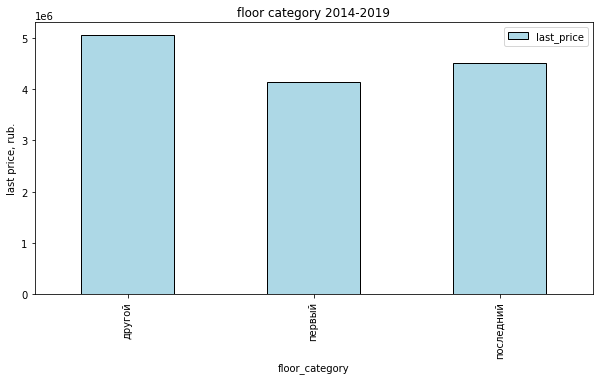

In [56]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('floor category 2014-2019')
data.query('last_price<12000000').pivot_table(index ='floor_category', values='last_price').plot(kind ='bar',figsize = (10,5), ax=ax
, color = 'lightblue', ec = 'black'); #без выбросов

Ожидаемо: первый и последний этаж - дешевле

**Зависимость цены от дня недели, месяца года**

Построим график заквисимости медианы **last_price** от периода продажи

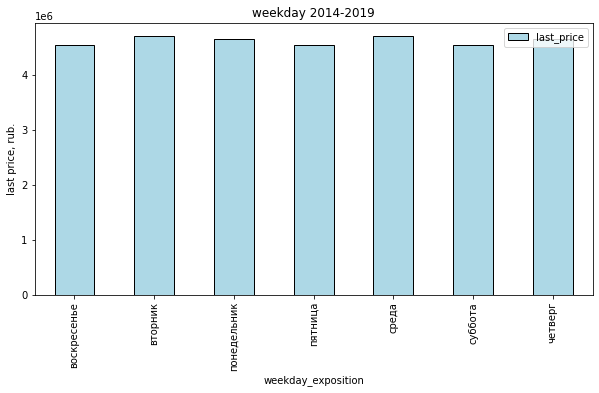

In [57]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('weekday 2014-2019')
data.pivot_table(index ='weekday_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
, color = 'lightblue', ec = 'black', ax=ax);

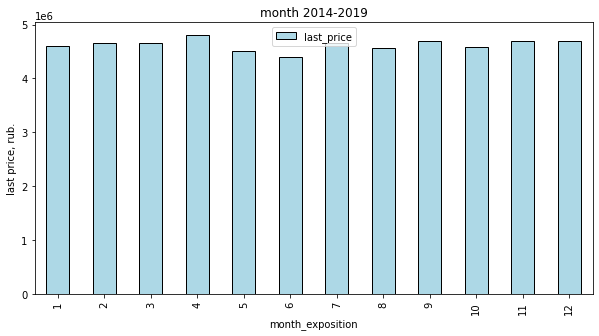

In [58]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('month 2014-2019')
data.pivot_table(index ='month_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5),
ax=ax , color = 'lightblue', ec = 'black');

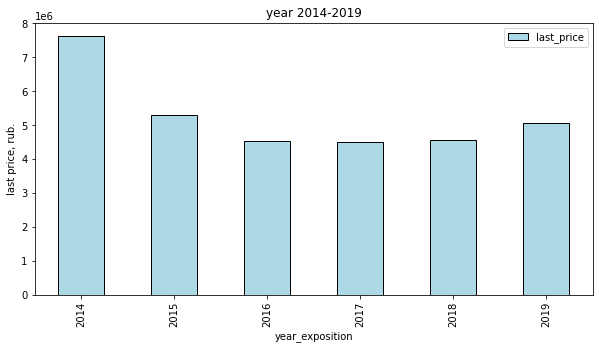

In [59]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('year 2014-2019')
data.pivot_table(index ='year_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5),
ax=ax , color = 'lightblue', ec = 'black');

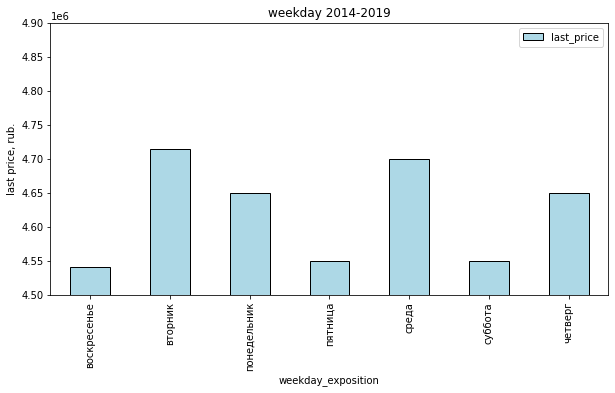

In [60]:

fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('weekday 2014-2019')
data.pivot_table(index ='weekday_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5), ax=ax
 , color = 'lightblue', ec = 'black', ylim = (4500000, 4900000));

Разницы по дням продажи практически нет. В выходные активность чуть меньше

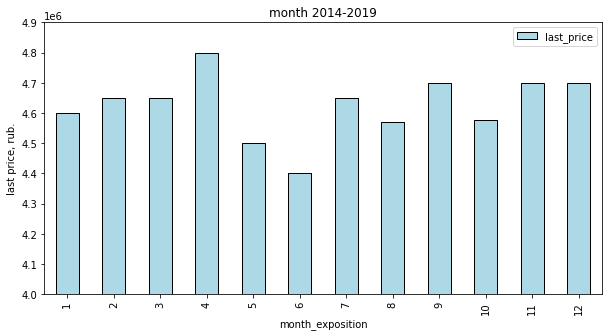

In [61]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('month 2014-2019')
data.pivot_table(index ='month_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5),ax=ax
 , color = 'lightblue', ec = 'black', ylim = (4000000, 4900000));

Пик продаж - апрель, яма - в июне. Ну тут все очевидно: считается что активный деловой период это осень и весна. Летом - период отпусков и многие впросы часто откладывают либо стараются завершить побыстрее (что мы и видим на графике). Аналогично все сделки хотят завершить до нового года (ноябрь и декабрь). Май и январь занижены за счёт длинных праздников.

В общем можно сказать, что месяц не особо влияет на продажи. Факторы, влияющие на продажи (по месяцам) - это некоторая сезонность

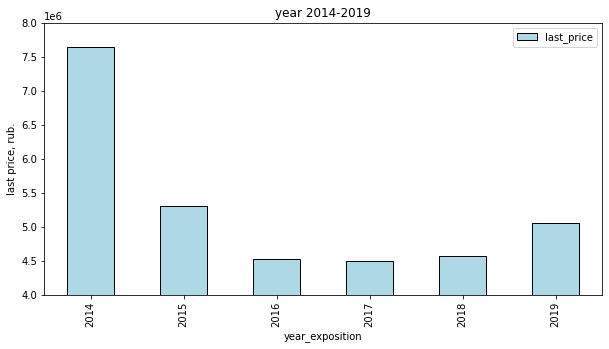

In [62]:

fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('year 2014-2019')
data.pivot_table(index ='year_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (4000000, 8000000),ax=ax);

2014 год выделяется. Надо смотреть подробней. 2014 год начало кризиса в РФ. При первых признаках кризиса люди стараются вложить деньги в недвижимость, валюту, золото и т.д. следовательно идёт всплеск сделок. Затем логично идет спад если кризис затягивается: курс рубля падает, платежеспособность падает -> количество сделок падает. 2019 - относительная стабилизация и рост увеличения сделок.

Смотрим 2014 поподробнее

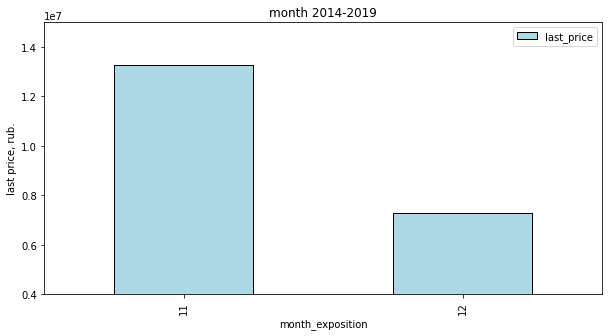

In [63]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('month 2014-2019')
data.query ('year_exposition == 2014').pivot_table(index ='month_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (4000000, 15000000),ax=ax);

Данные есть только за два последних месяца 2014 года. Как мне кажется, мы видим падение пика инвестиций в неджвижимость, курс евро с октября по ноябрь 2014 вырос практически два раза. И когда он пробил потолок, цены рванули вверх и покупать недвижимость стало поздно. Началось плавное падение продаж.

In [64]:
data['last_price_thousand'] = data['last_price'] / 1000

**Зависимость стоимости от общей площади**

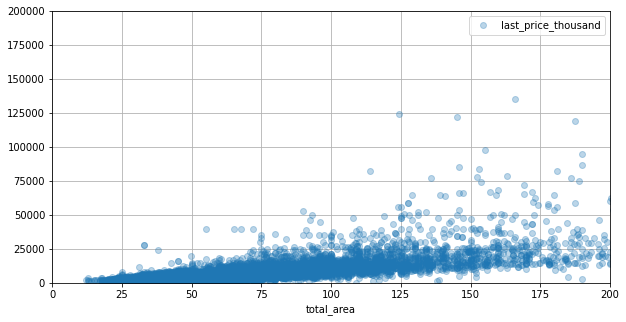

In [65]:
#Зависимость стоимости от общей площади
data.plot(x='total_area', y='last_price_thousand', style='o', xlim=(0, 200), ylim=(0, 200000), grid=True, figsize=(10, 5), alpha=0.3)
plt.show()

In [66]:
data['living_area'].corr(data['last_price_thousand'])

0.5665146370310733

На графике мы видим увеличение стоимости вместе с ростом общей площади квартиры.

**Зависимость стоимости от жилой площади**

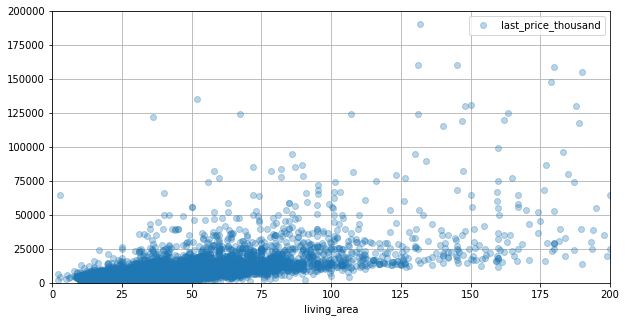

In [67]:
data.plot(x='living_area', y='last_price_thousand', style='o', xlim=(0, 200), ylim=(0, 200000), grid=True, figsize=(10, 5), alpha=0.3)
plt.show()

Здесь мы опять видим влияние жилой площади на стоимость квартиры. Цена квартиры растет вместе с жилой площадью.

**Зависимость стоимости от площади кухни**

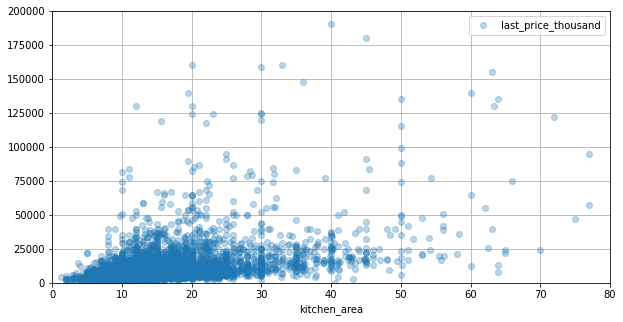

In [68]:
data.plot(x='kitchen_area', y='last_price_thousand', style='o', xlim=(0, 80), ylim=(0, 200000), grid=True, figsize=(10, 5), alpha=0.3)
plt.show()

**Рассмотрим 10 городов с наибольшим числом объявлений**

In [69]:
print('Toп 10 городов по продажам',
    data['locality_name'].value_counts().head(10).to_frame()) #посмотрим на них

Toп 10 городов по продажам                    locality_name
Санкт-Петербург            15638
посёлок Мурино               518
посёлок Шушары               439
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      306
деревня Кудрово              299
Выборг                       237


соберем датафрейм для просмотра медиан по цене за квадратный метр и стоимости квартиры

In [70]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_of_m2,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,to_center_km,fromcenter_cat,last_price_thousand
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,120370,четверг,3,2019,другой,0.47,0.23,16.0,до КАД,13000.0
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,False,...,82920,вторник,12,2018,первый,0.46,0.27,18.0,до КАД,3350.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,92785,четверг,8,2015,другой,0.61,0.15,13.0,до КАД,5196.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,False,...,408176,пятница,7,2015,другой,NaN,NaN,6.0,до КАД,64900.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,100000,вторник,6,2018,другой,0.32,0.41,8.0,до КАД,10000.0


In [71]:
top10 = data['locality_name'].value_counts().index.tolist()[0:10]
mean10_metrics = [data[data['locality_name'] == city]['price_of_m2'].median() for city in top10]
mean10_prices = [data[data['locality_name'] == city]['last_price'].median() for city in top10]
top10frame = {'city': top10, 'price_of_m2': mean10_metrics, 'last_price': mean10_prices}
dataframe = pd.DataFrame(top10frame).sort_values(by = 'price_of_m2', ascending = False)
print(dataframe)

                city  price_of_m2  last_price
0    Санкт-Петербург     104793.5   5500000.0
4             Пушкин     100000.0   5180000.0
8    деревня Кудрово      91860.0   3790000.0
6  посёлок Парголово      91642.0   4100000.0
1     посёлок Мурино      85890.0   3400000.0
2     посёлок Шушары      76829.0   3950000.0
5            Колпино      74723.5   3600000.0
7            Гатчина      67860.0   3095000.0
3         Всеволожск      65789.0   3450000.0
9             Выборг      58158.0   2897000.0


Ожидаемо, самый большой ценник в Питере. Затем - исторический и зелёный пригород - г. Пушкин. 3 - 6 место - новостройки в районе КАД. Кудрово и Мурино формально вообще Ленобласть. 7-10 места города за КАДом, ближайший из которых - Колпино. Самый дешевый - Выборг. Находится почти на границе с Финляндией

**Посмотрим на зависимость цены**

In [72]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)
data['city_centers_nearest_km'].to_frame().head() #переведем метры в километры и округлим. Проверим

,city_centers_nearest_km
0,16.0
1,19.0
2,14.0
3,7.0
4,8.0


Составим график зависимости удаленности от центра от стоимости. Фильтр возьмем по Петербургу

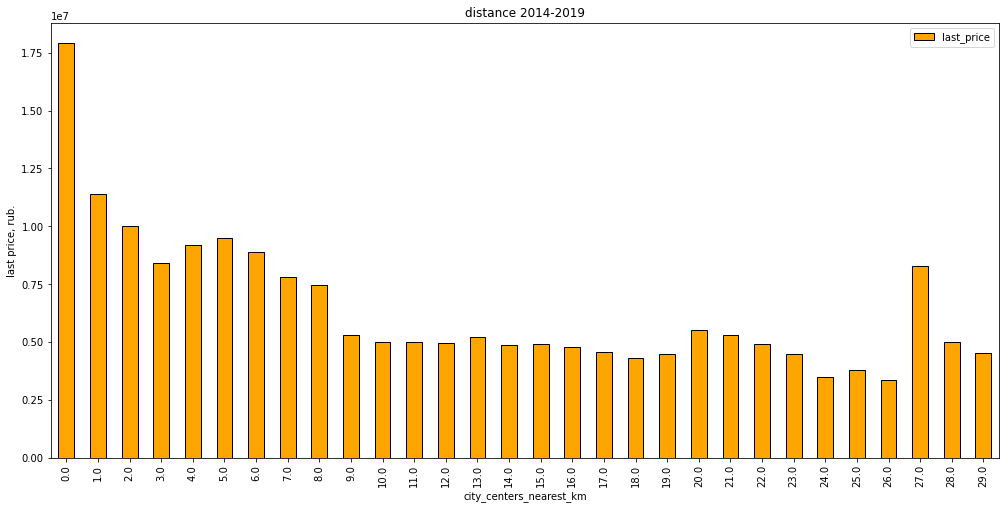

In [73]:
estate_spb = data.query('locality_name == "Санкт-Петербург"')

fig, ax = plt.subplots()
ax.set_ylabel('last price, rub.')
ax.set_title('distance 2014-2019')
estate_spb.pivot_table(index ='city_centers_nearest_km', values='last_price', aggfunc = 'median').plot(kind ='bar',
                                figsize = (17,8), xlim = (0,30), color = 'orange', ec = 'black',ax=ax);

По графику можно сказать, что центр - это от 0 до 8 км (ранее мы установили этот параметр = 5). Далее медианная цена на квартиры резко падает.

**Рассмотрим детально центр Петербурга. Как видно из графика выше - это от 0 до 8 км**

Сравниваем по:

площади;

цене;

числу комнат;

высоте потолков

Повторим наши графики, как и в целом по датафрейму, но уже взяв срез по центру

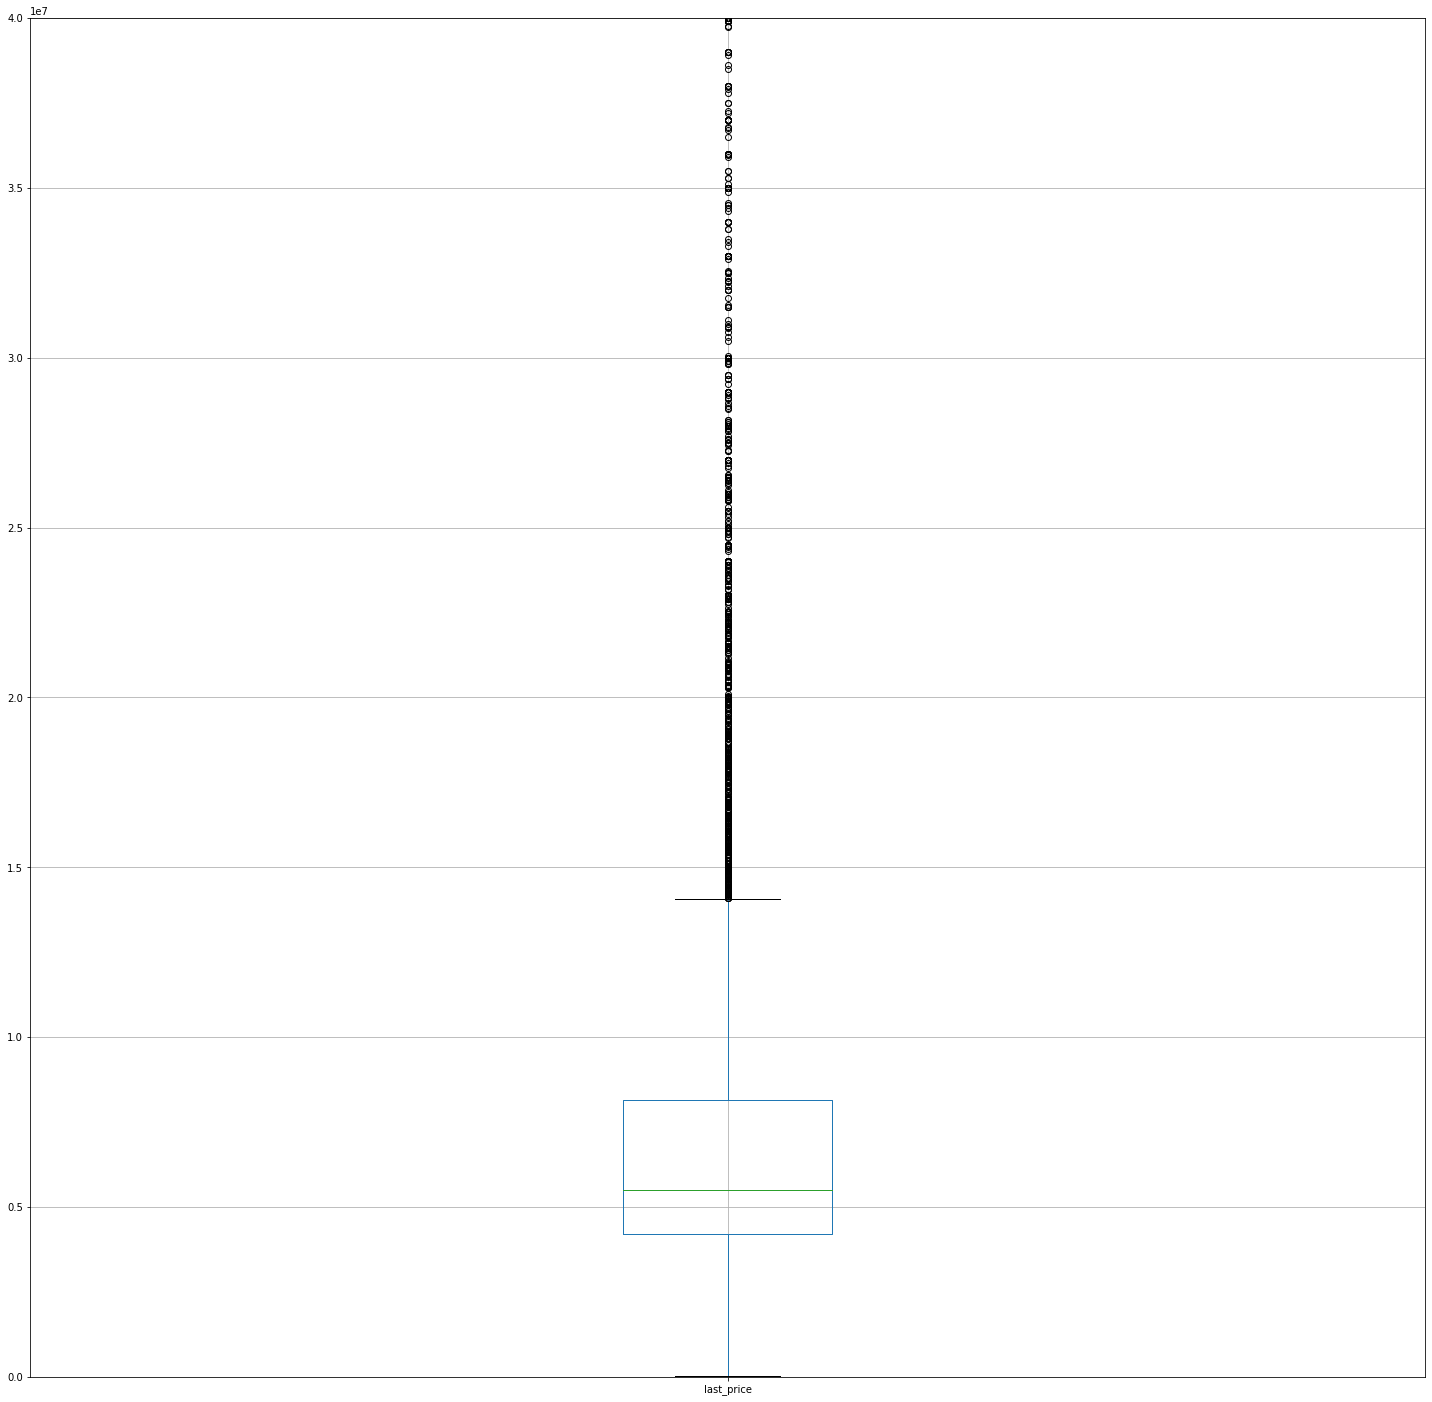

In [74]:
estate_spb.boxplot('last_price', figsize = (25, 25))
plt.ylim(0,40000000); #посмотрим выбросы в СПб

Верхняя граница - **14 млн.руб**

In [75]:
estate_spb_center = estate_spb.query('city_centers_nearest <= 8000')

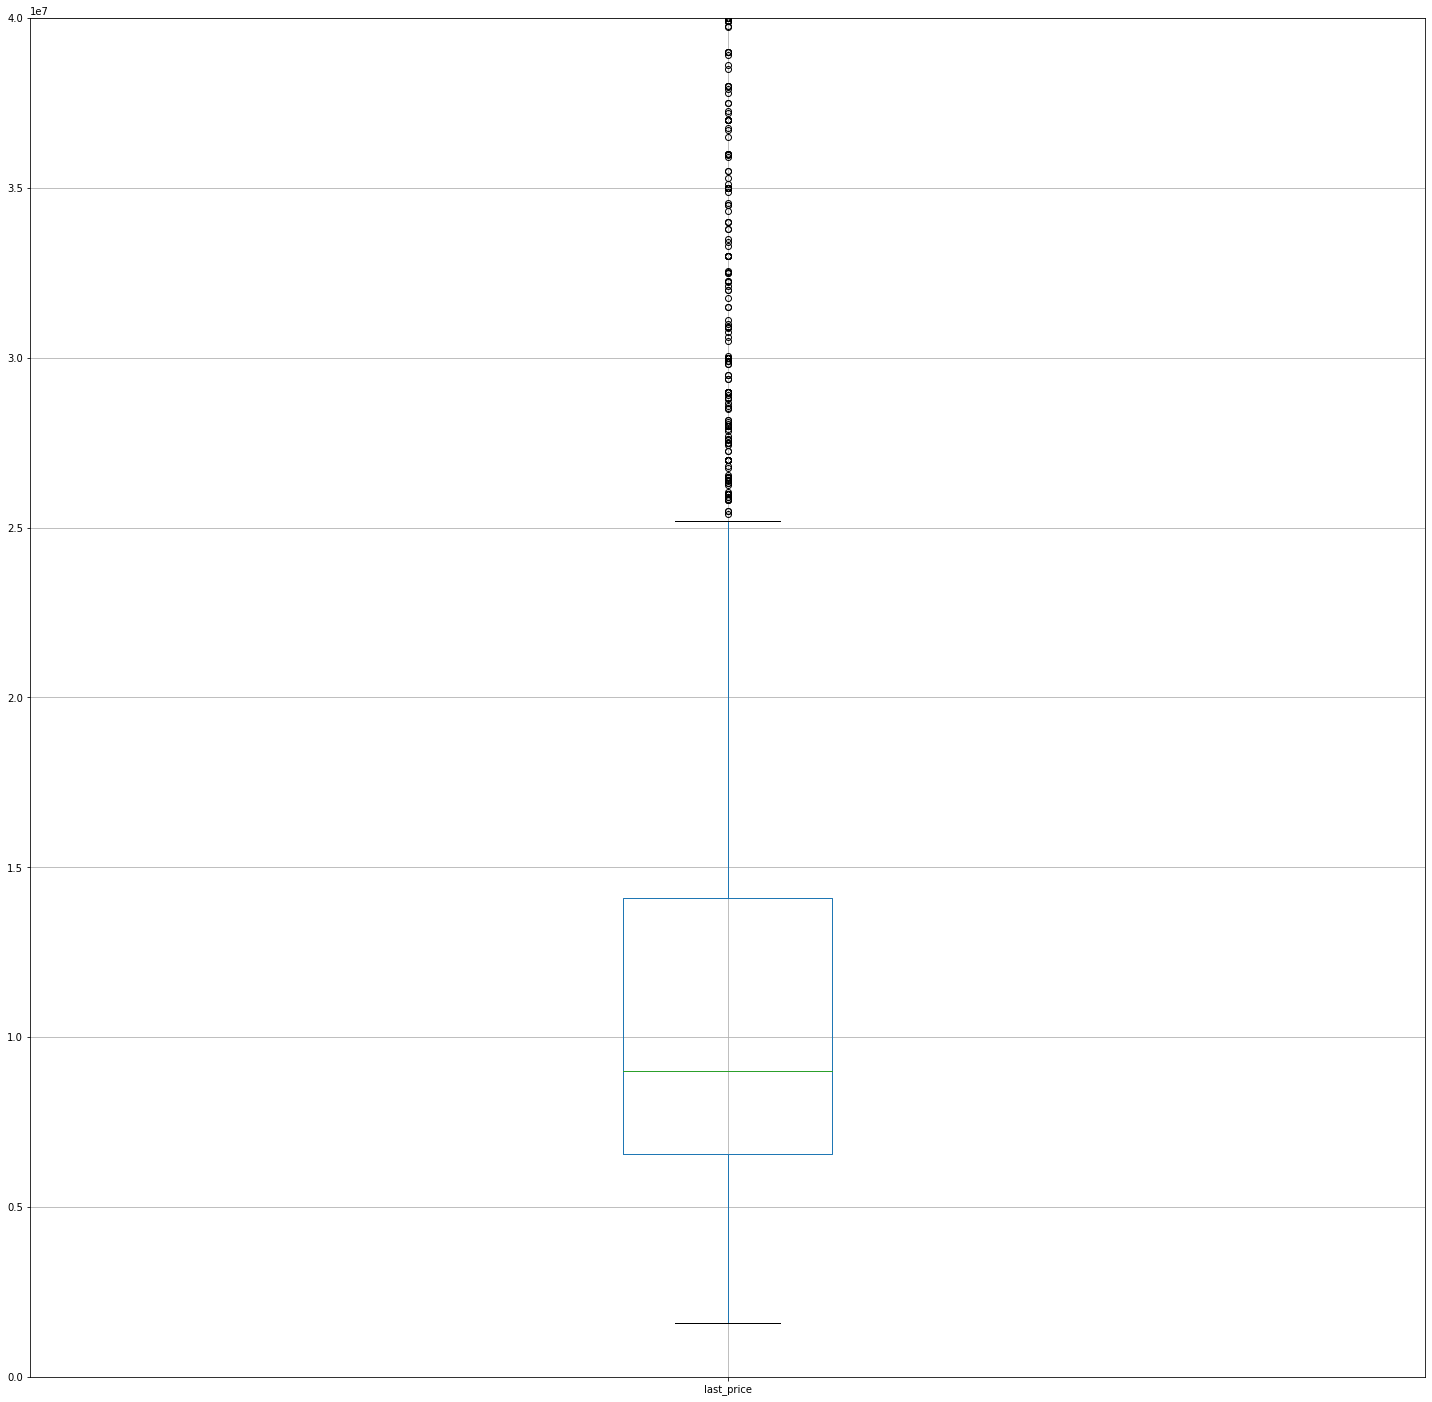

In [76]:
estate_spb_center.boxplot('last_price', figsize = (25, 25))
plt.ylim(0,40000000); #посмотрим выбросы в центре СПб

Верхняя граница = 26млн. рублей. Используем ее в дальнейших расчетах

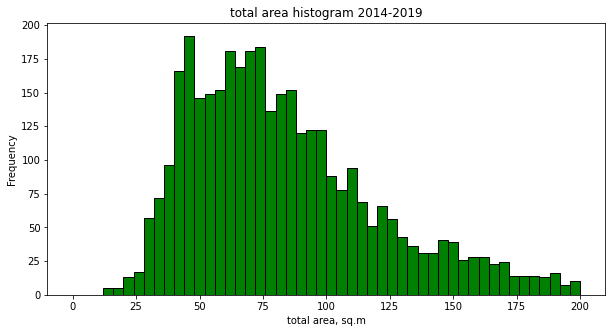

In [77]:
fig, ax = plt.subplots()
ax.set_xlabel('total area, sq.m')
ax.set_title('total area histogram 2014-2019')
estate_spb_center['total_area'].plot(kind='hist', ec = 'black', bins = 50, range =(0,200), grid = False, figsize = (10,5), color='green');

Большинство квартир в центре Питера имеют площадь от 40 до 100 квадратных метра

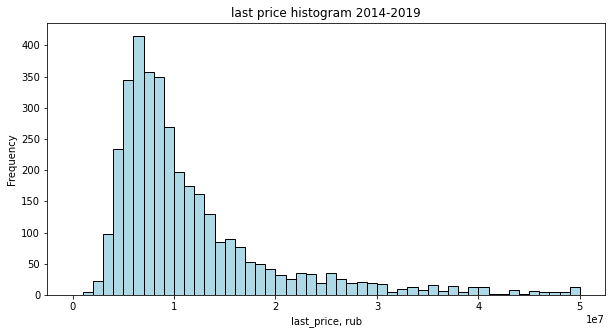

In [78]:
fig, ax = plt.subplots()
ax.set_xlabel('last_price, rub')
ax.set_title('last price histogram 2014-2019')
estate_spb_center['last_price'].plot(kind='hist', ec = 'black', bins = 50, color = 'lightblue', grid = False, figsize = (10,5),range =(0,50000000));


Цена самых популярных квартир - от 8 до 10 млн. руб

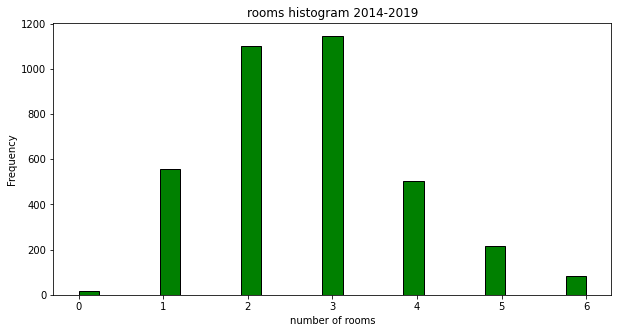

In [79]:
fig, ax = plt.subplots()
ax.set_xlabel('number of rooms')
ax.set_title('rooms histogram 2014-2019')
estate_spb_center['rooms'].plot(kind='hist', ec = 'black', bins = 25, range =(0, 6), color = 'green', grid = False, figsize = (10,5),ax=ax);

В основном в центре 2-3х комнатные квартиры

**Зависимость цены от числа комнат, этажа и удалённости от центра**

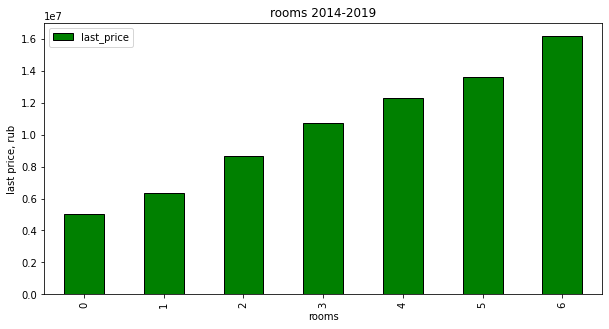

In [80]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub');
ax.set_title('rooms 2014-2019')
estate_spb_center.query('rooms<=6 and last_price <26000000').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'green', ec = 'black', ax=ax); #сразу откинем выбросы

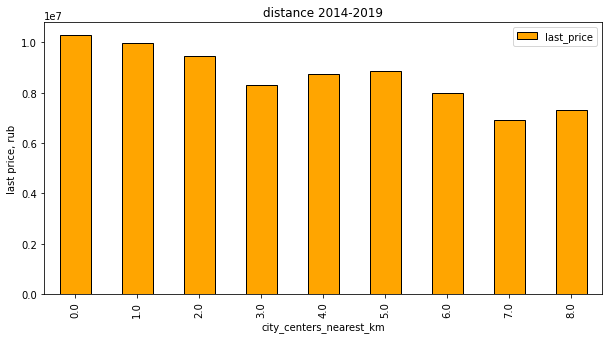

In [81]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('distance 2014-2019')
estate_spb_center.query('last_price < 26000000').pivot_table(index ='city_centers_nearest_km', values='last_price', aggfunc = 'median').plot(kind ='bar',figsize = (10,5), xlim = (0,10), color = 'orange', ec = 'black',ax=ax);


Дальше от центра - дешевле, все логично

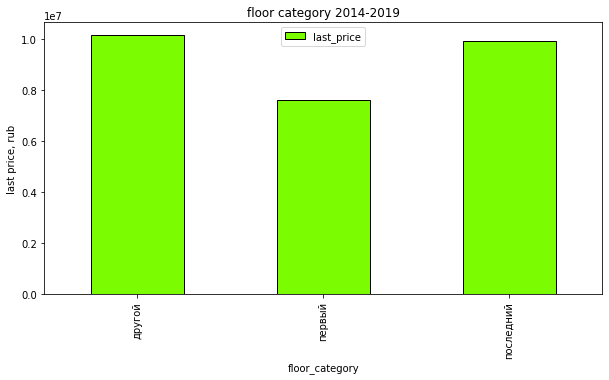

In [82]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('floor category 2014-2019')
estate_spb_center.query('last_price < 26000000').pivot_table(index ='floor_category', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'lawngreen', ec = 'black',ax=ax);

Вид на крыши Петербурга стоит дорого. Тут мы видим различие от общего датафрейма. Последний этаж практически равен другому

**Зависимость цены в центре Питера от дня недели, месяца года**

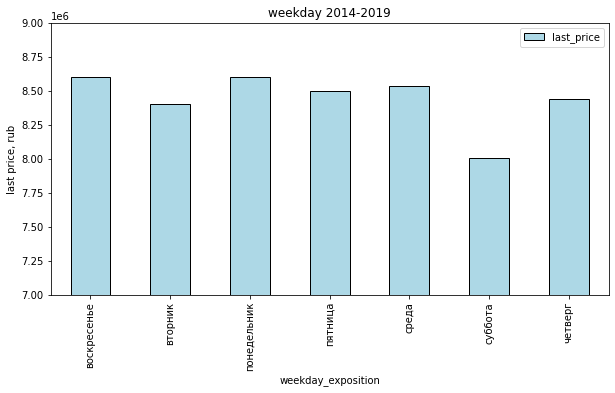

In [83]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('weekday 2014-2019')
estate_spb_center.query('last_price < 26000000').pivot_table(index ='weekday_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (7000000, 9000000),ax=ax);

День недели практически не влияет на медианноую стоимость кваритр

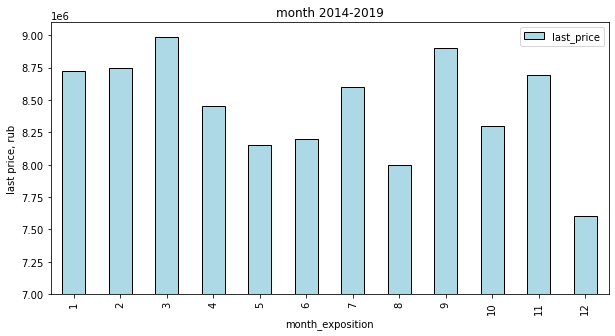

In [84]:

fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('month 2014-2019')
estate_spb_center.query('last_price < 26000000').pivot_table(index ='month_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (7000000, 9100000),ax=ax);

Картина отличается от общего датафрейма, там самый дорогой месяц был в апреле. В центре Питера - март. Летний месяцы - квартира дешевле

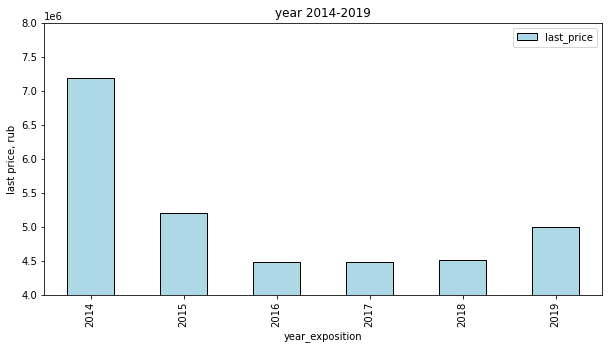

In [85]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('year 2014-2019')
data.query('last_price < 26000000').pivot_table(index ='year_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (4000000, 8000000),ax=ax);

Аналогично общему датафрейму - самая большая медианная стоимость в 2014. Рассмотрим поподробнее

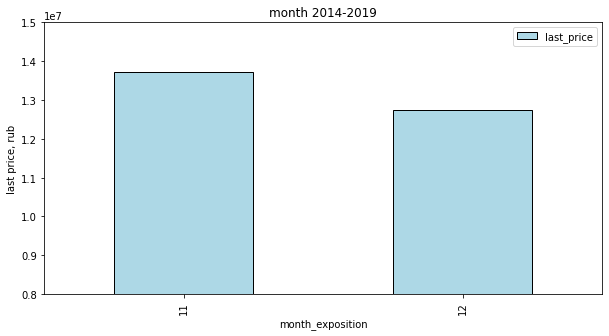

In [86]:
fig, ax = plt.subplots()
ax.set_ylabel('last price, rub')
ax.set_title('month 2014-2019')
estate_spb_center.query('year_exposition == 2014 and  last_price < 26000000').pivot_table(index ='month_exposition', values='last_price', aggfunc='median').plot(kind ='bar',figsize = (10,5)
 , color = 'lightblue', ec = 'black', ylim = (8000000, 15000000),ax=ax);

В отличии от общего датафрейма, спад более плавный

Будет правильным вывести графики для всего датафрейма, Питера и центра Питера в сравнении. Вдруг что-то упустили или не заметили

Cрезы берём в соответствии с boxplot() для каждого района

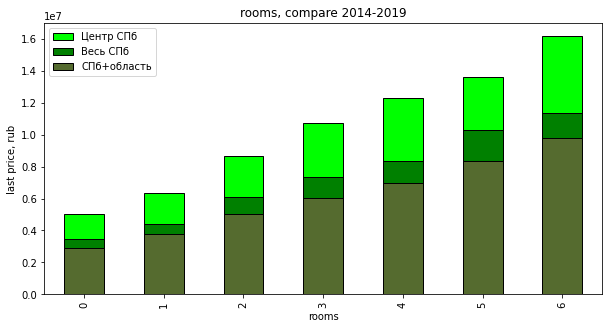

In [87]:
ax = plt.gca()

ax.set_title('rooms, compare 2014-2019')
ax.set_ylabel('last price, rub')

estate_spb_center.query('rooms<=6 and last_price < 26000000').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'lime', ec = 'black', ax=ax)

estate_spb.query('rooms<=6 and last_price < 14000000').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'green', ec = 'black', ax=ax)

data.query('rooms<=6 and last_price < 12000000').pivot_table(index ='rooms', values='last_price').plot(kind ='bar',figsize = (10,5)
, color = 'darkolivegreen', ec = 'black', ax=ax)

plt.legend(['Центр СПб', 'Весь СПб', 'СПб+область']);

Чем больше комнат, тем больше цена. Независимо от геолокации.

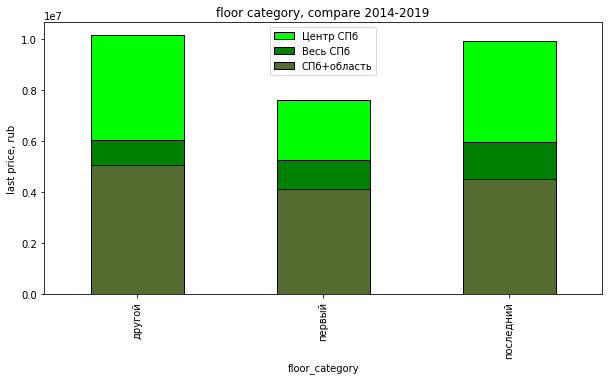

In [88]:
ax = plt.gca()

ax.set_ylabel('last price, rub')
ax.set_title('floor category, compare 2014-2019')

estate_spb_center.query('last_price < 26000000').pivot_table(index ='floor_category', values='last_price').plot(kind ='bar',
                                                            figsize = (10,5) , color = 'lime', ec = 'black', ax=ax)
estate_spb.query('last_price < 14000000').pivot_table(index ='floor_category', values='last_price').plot(kind ='bar',
                                                    figsize = (10,5) , color = 'green', ec = 'black', ax=ax)
data.query('last_price < 12000000').pivot_table(index ='floor_category', values='last_price').plot(kind ='bar',
                                                        figsize = (10,5) , color = 'darkolivegreen', ec = 'black', ax=ax)

plt.legend(['Центр СПб', 'Весь СПб', 'СПб+область']);

На первом этаже квартиры везде дешевле

Сравнение по времени по годам / месяцам / дням недели строить не вижу смысла, т.к. стоимость квартиры не слишком зависит от даты публикации. Есть некоторая сезонность. Но она незначительна. Это видно и так на графиках выше.

Добавим совместную гистограмму по времени продаж для наших трех районов. Границы возьмем по .boxplot() для days_exposition

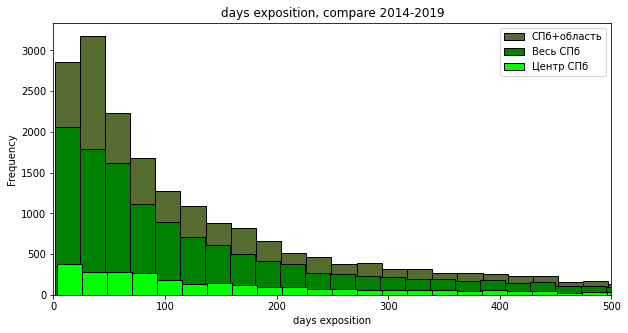

In [89]:
ax = plt.gca()

ax.set_xlabel('days exposition')
ax.set_title('days exposition, compare 2014-2019')

data['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='darkolivegreen', xlim = (0,500))
estate_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='green', xlim = (0,500))
estate_spb_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='lime', xlim = (0,500))

plt.legend(['СПб+область', 'Весь СПб', 'Центр СПб']);

Видны некоторые различия по районам. Центр и Спб продаются за первые 25 дней, область же похоже влияет на весь регион. Там период продаж 25-50 дней. Сложно сказать с чем это связано. Кудрово и Девяткино(Мурино) формально облаcть, города с пешей доступностью метро. Выбор там велик. Вариантов много - возможно этот фактор и затягивает срок продажи

Посмотрим, как влияют остальные параметры квартиры на её окончательную цену, используем .corr() для формирования общей таблицы

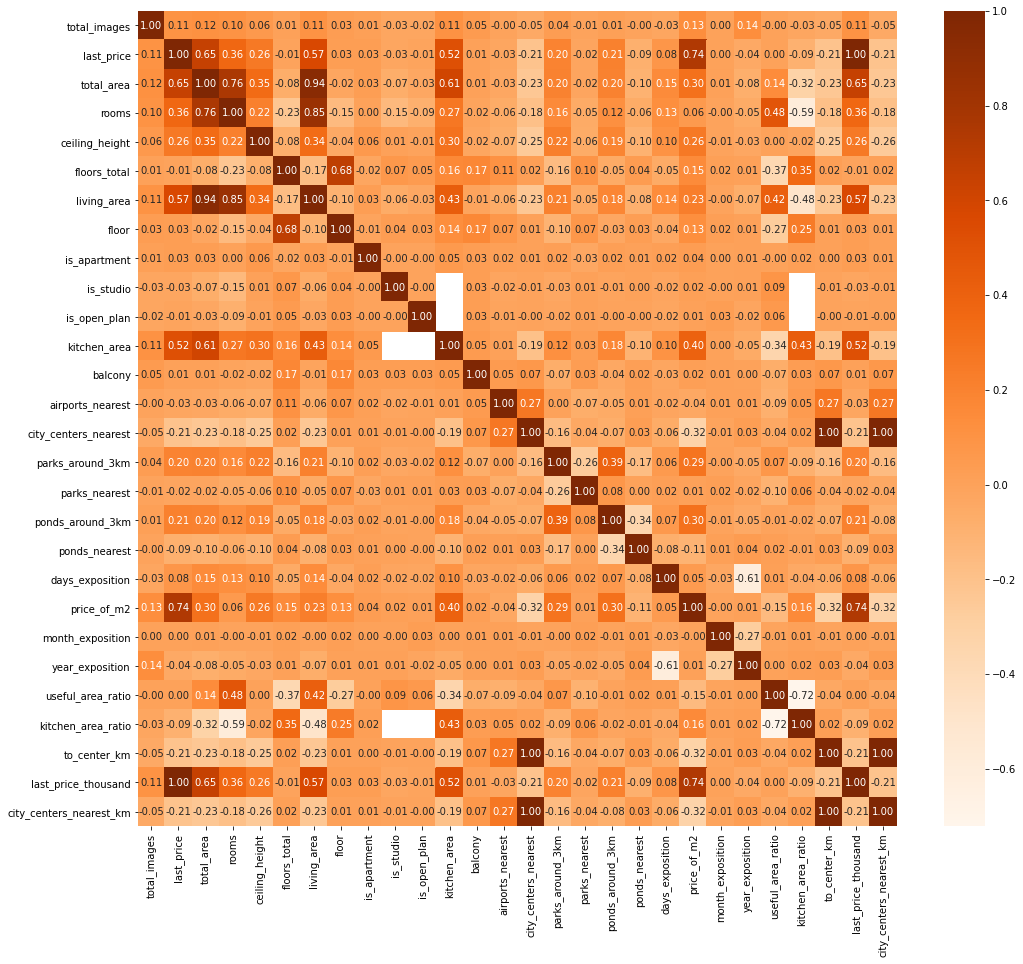

In [90]:
plt.figure(figsize=(17,15))
sns.heatmap(data.corr(), annot=True, cmap="Oranges", fmt='.2f');

Выделем столбец 'last_price'

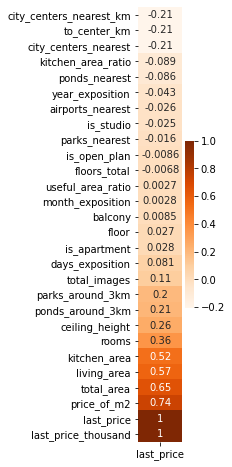

In [91]:
plt.figure(figsize=(1,8))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=True), cmap="Oranges", annot = True);

Сильнее всего стоимость квартиры зависит от площади, цены за кв.метр, площади жилой и площади кухни, а так же от количества комнат

## Общий вывод

Цена квартиры больше всего зависит от следущих вещей:

**Площадь квартиры** - Фактор больше всего влияющий на окончательную стоимость. Чем больше площадт квартиры, тем выше цена. Независимо от локации.

**Цена за квадратный метр** - Аналогично площади квартиры. Чем выше стоимость квадратного метра (а она зависит от стоимости земли, на которой стоим жилье) тем дороже квартира

**Жилая площадь и площадь кухни** - Чем выше доля жилой площади/площадь кухни, тем выше цена

**Число комнат** - Число комнат прямо влияет на стоимость жилья. Чем больше комнат, тем дороже

**Этаж квартиры** - Ожидаемо: первый этаж дешевле всего. В центре СПб стоимость последнего этажа фактически равна другим. Вид на крыши Петербурга стоит дорого. В остальных случаях последний этаж чуть дешевле других этажей

**Удаленность от центра** - Мы видим зависимость без сюрпризов, Чем ближе к центру - там дороже. Причем в радиусе 1-2 км от центра квартиры на порядок дороже. Выделяется медианная стоимость в районе 8 км от центра. Очевидно, на нее влияет элитный Крестовский остров в составе Петроградского района.

**Дата публикации** - В связи с кризисом и обвалом рубля в 2014 году наблюдаются спад продаж. Спрос на квартиры начинает постепенно возвращаться в 2019 году

**Время продажи** - большинство квартир продаются в срок от 0 до 50 дней. В области есть перекос на период 25-50 дней. В городе же он равен 0-25 дней. Так же следует отметить что этот параметр не совсем точен. Большинство объявлений закрываются автоматически с периодом, равным 30 дней.
